# Title : 1985 Auto Imports Database Analyses 

<img src='Large10.jpg'>

## <font color='green'>Data Dictionary</font>
### Input variables

 01. **symboling**:            [its assigned insurance risk rating -> [-3, -2, -1, 0, 1, 2, 3]] 
 02. **normalized-losses**:    [average loss payment per insured vehicle year -> continuous from 65 to 256.]  
 03. make:                     [ Manufacturer name eg : alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu etc. ]
 04. fuel-type:                [diesel, gas]
 05. aspiration:               [std, turbo]
 06. num-of-doors:             [four, two].
 07. body-style:               [hardtop, wagon, sedan, hatchback, convertible]
 08. drive-wheels:             [4wd, fwd, rwd]
 09. engine-location:          [front, rear]
 10. wheel-base:               [continuous from 86.6 120.9]
 11. length:                   [continuous from 141.1 to 208.1]
 12. width:                    [continuous from 60.3 to 72.3]
 13. height:                   [continuous from 47.8 to 59.8]
 14. curb-weight:              [continuous from 1488 to 4066]
 15. engine-type:              [dohc, dohcv, l, ohc, ohcf, ohcv, rotor]
 16. num-of-cylinders:         [eight, five, four, six, three, twelve, two]
 17. engine-size:              [continuous from 61 to 326]
 18. fuel-system:              [1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi]
 19. bore:                     [continuous from 2.54 to 3.94]
 20. stroke:                   [continuous from 2.07 to 4.17]
 21. compression-ratio:        [continuous from 7 to 23]
 22. horsepower:               [continuous from 48 to 288]
 23. peak-rpm:                 [continuous from 4150 to 6600]
 24. city-mpg:                 [continuous from 13 to 49]
 25. highway-mpg:              [continuous from 16 to 54]
 
 ## Output Variable
  price:                    [continuous from 5118 to 45400]


## Import libraries

In [404]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import Imputer

from sklearn.preprocessing import Normalizer

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt   
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns

##                                                Load data
### <font color='red'>1. Load the file “imports-85.data” into a dataframe from https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data (Links to an external site.) and column names of this data set can be found here --https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names </font>

In [383]:
df = pd.read_csv("imports-85.data.txt",na_values=['?'],header = None)

In [384]:
df.columns = ["symboling","normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors" ,"body-style" ,"drive-wheels", "engine-location" , "wheel-base" ,"length", "width", "height" ,"curb-weight", "engine-type" ,"num-of-cylinders" ,"engine-size" ,"fuel-system" ,"bore","stroke" ,"compression-ratio", "horsepower" ,"peak-rpm" ,"city-mpg" ,"highway-mpg","price"]    

In [385]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### <font color='red'>2. Explain the problem statement. What are you predicting and what attributes you have to predict? </font>

#### The Problem statement is to predict the price of the Car given all the related information abbout it as shown below

##### This data set consists of three types of entities:
##### (a) the specification of an auto in terms of various characteristics 
##### (b)its assigned insurance risk rating
##### (c) its normalized losses in use as compared to other cars.  

##  Exploratory Data Analysis

### a. Analyse Data
### <font color='red'> 3. Browse a sample record from the dataframe. Are there any missing values?  <\font>

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-

In [387]:
df.describe()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
count,5.00000,5.0,5.000000,5.0,5.0,5.000000,5.0,5.000000,5.0,5.000000,...,5.000000,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,2.20000,164.0,0.400000,0.0,0.0,0.600000,1.0,1.400000,0.0,94.180000,...,1.000000,131.400000,0.0,3.200000,3.126000,9.000000,118.600000,5200.000000,20.600000,26.400000
std,0.83666,0.0,0.547723,0.0,0.0,0.547723,1.0,0.894427,0.0,5.504725,...,0.707107,15.420765,0.0,0.322645,0.408142,0.707107,20.354361,273.861279,2.302173,2.880972
min,1.00000,164.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,88.600000,...,0.000000,109.000000,0.0,2.680000,2.680000,8.000000,102.000000,5000.000000,18.000000,22.000000
25%,2.00000,164.0,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.0,88.600000,...,1.000000,130.000000,0.0,3.190000,2.680000,9.000000,111.000000,5000.000000,19.000000,26.000000
50%,2.00000,164.0,0.000000,0.0,0.0,1.000000,1.0,2.000000,0.0,94.500000,...,1.000000,130.000000,0.0,3.190000,3.400000,9.000000,111.000000,5000.000000,21.000000,27.000000
75%,3.00000,164.0,1.000000,0.0,0.0,1.000000,2.0,2.000000,0.0,99.400000,...,1.000000,136.000000,0.0,3.470000,3.400000,9.000000,115.000000,5500.000000,21.000000,27.000000
max,3.00000,164.0,1.000000,0.0,0.0,1.000000,2.0,2.000000,0.0,99.800000,...,2.000000,152.000000,0.0,3.470000,3.470000,10.000000,154.000000,5500.000000,24.000000,30.000000


In [388]:
na_cols = {}
for col in df.columns:
    missed = df.shape[0] - df[col].dropna().shape[0]
    if missed > 0:
        na_cols[col] = missed

na_cols

{'bore': 4,
 'horsepower': 2,
 'normalized-losses': 41,
 'num-of-doors': 2,
 'peak-rpm': 2,
 'price': 4,
 'stroke': 4}

In [389]:
sum(df.isnull().any())
#sum(df.isnull().any())

7

In [390]:
df[np.any(df[df.columns[2:]].isnull(), axis=1)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


#### This clearly shows the number of rows and columns having missing or NA values. 

In [391]:
df[['normalized-losses','bore','stroke','horsepower','peak-rpm']] = df[['normalized-losses','bore','stroke','horsepower','peak-rpm']].astype('float64')

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-

In [393]:
df_1 = df.copy()

In [394]:
df_1.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### b. Refine & Transform


In [395]:
# Imputting Missing value
imp = Imputer(missing_values='NaN', strategy='mean' )
df_1[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']] = imp.fit_transform(df_1[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']])
df_1.head()
#########################################################################################################################

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [396]:
df_1['num-of-doors'] = df_1['num-of-doors'].fillna('four')

In [397]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
for i in ['make','fuel-type','aspiration', 'num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']:
    df_1[i] = labelencoder.fit_transform(df_1[i])
df_1.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### Analyse Dataset - 
##### 4 .How many records are available in the data set and how many attributes. Do you think the depth (number of records) is sufficient given the breadth? In other words, is the sample likely to be a good representative of the universe?

In [398]:
df_1.shape

(205, 26)

#### The above dataset has 205 rows and 26 columns which is not a good sample. We can say that it is not a good representative of the universe

### d. Visualize data
### <font color='red'> 5.Analyse the data distribution for the various attributes and share your observations. <\font>

In [399]:
%matplotlib inline

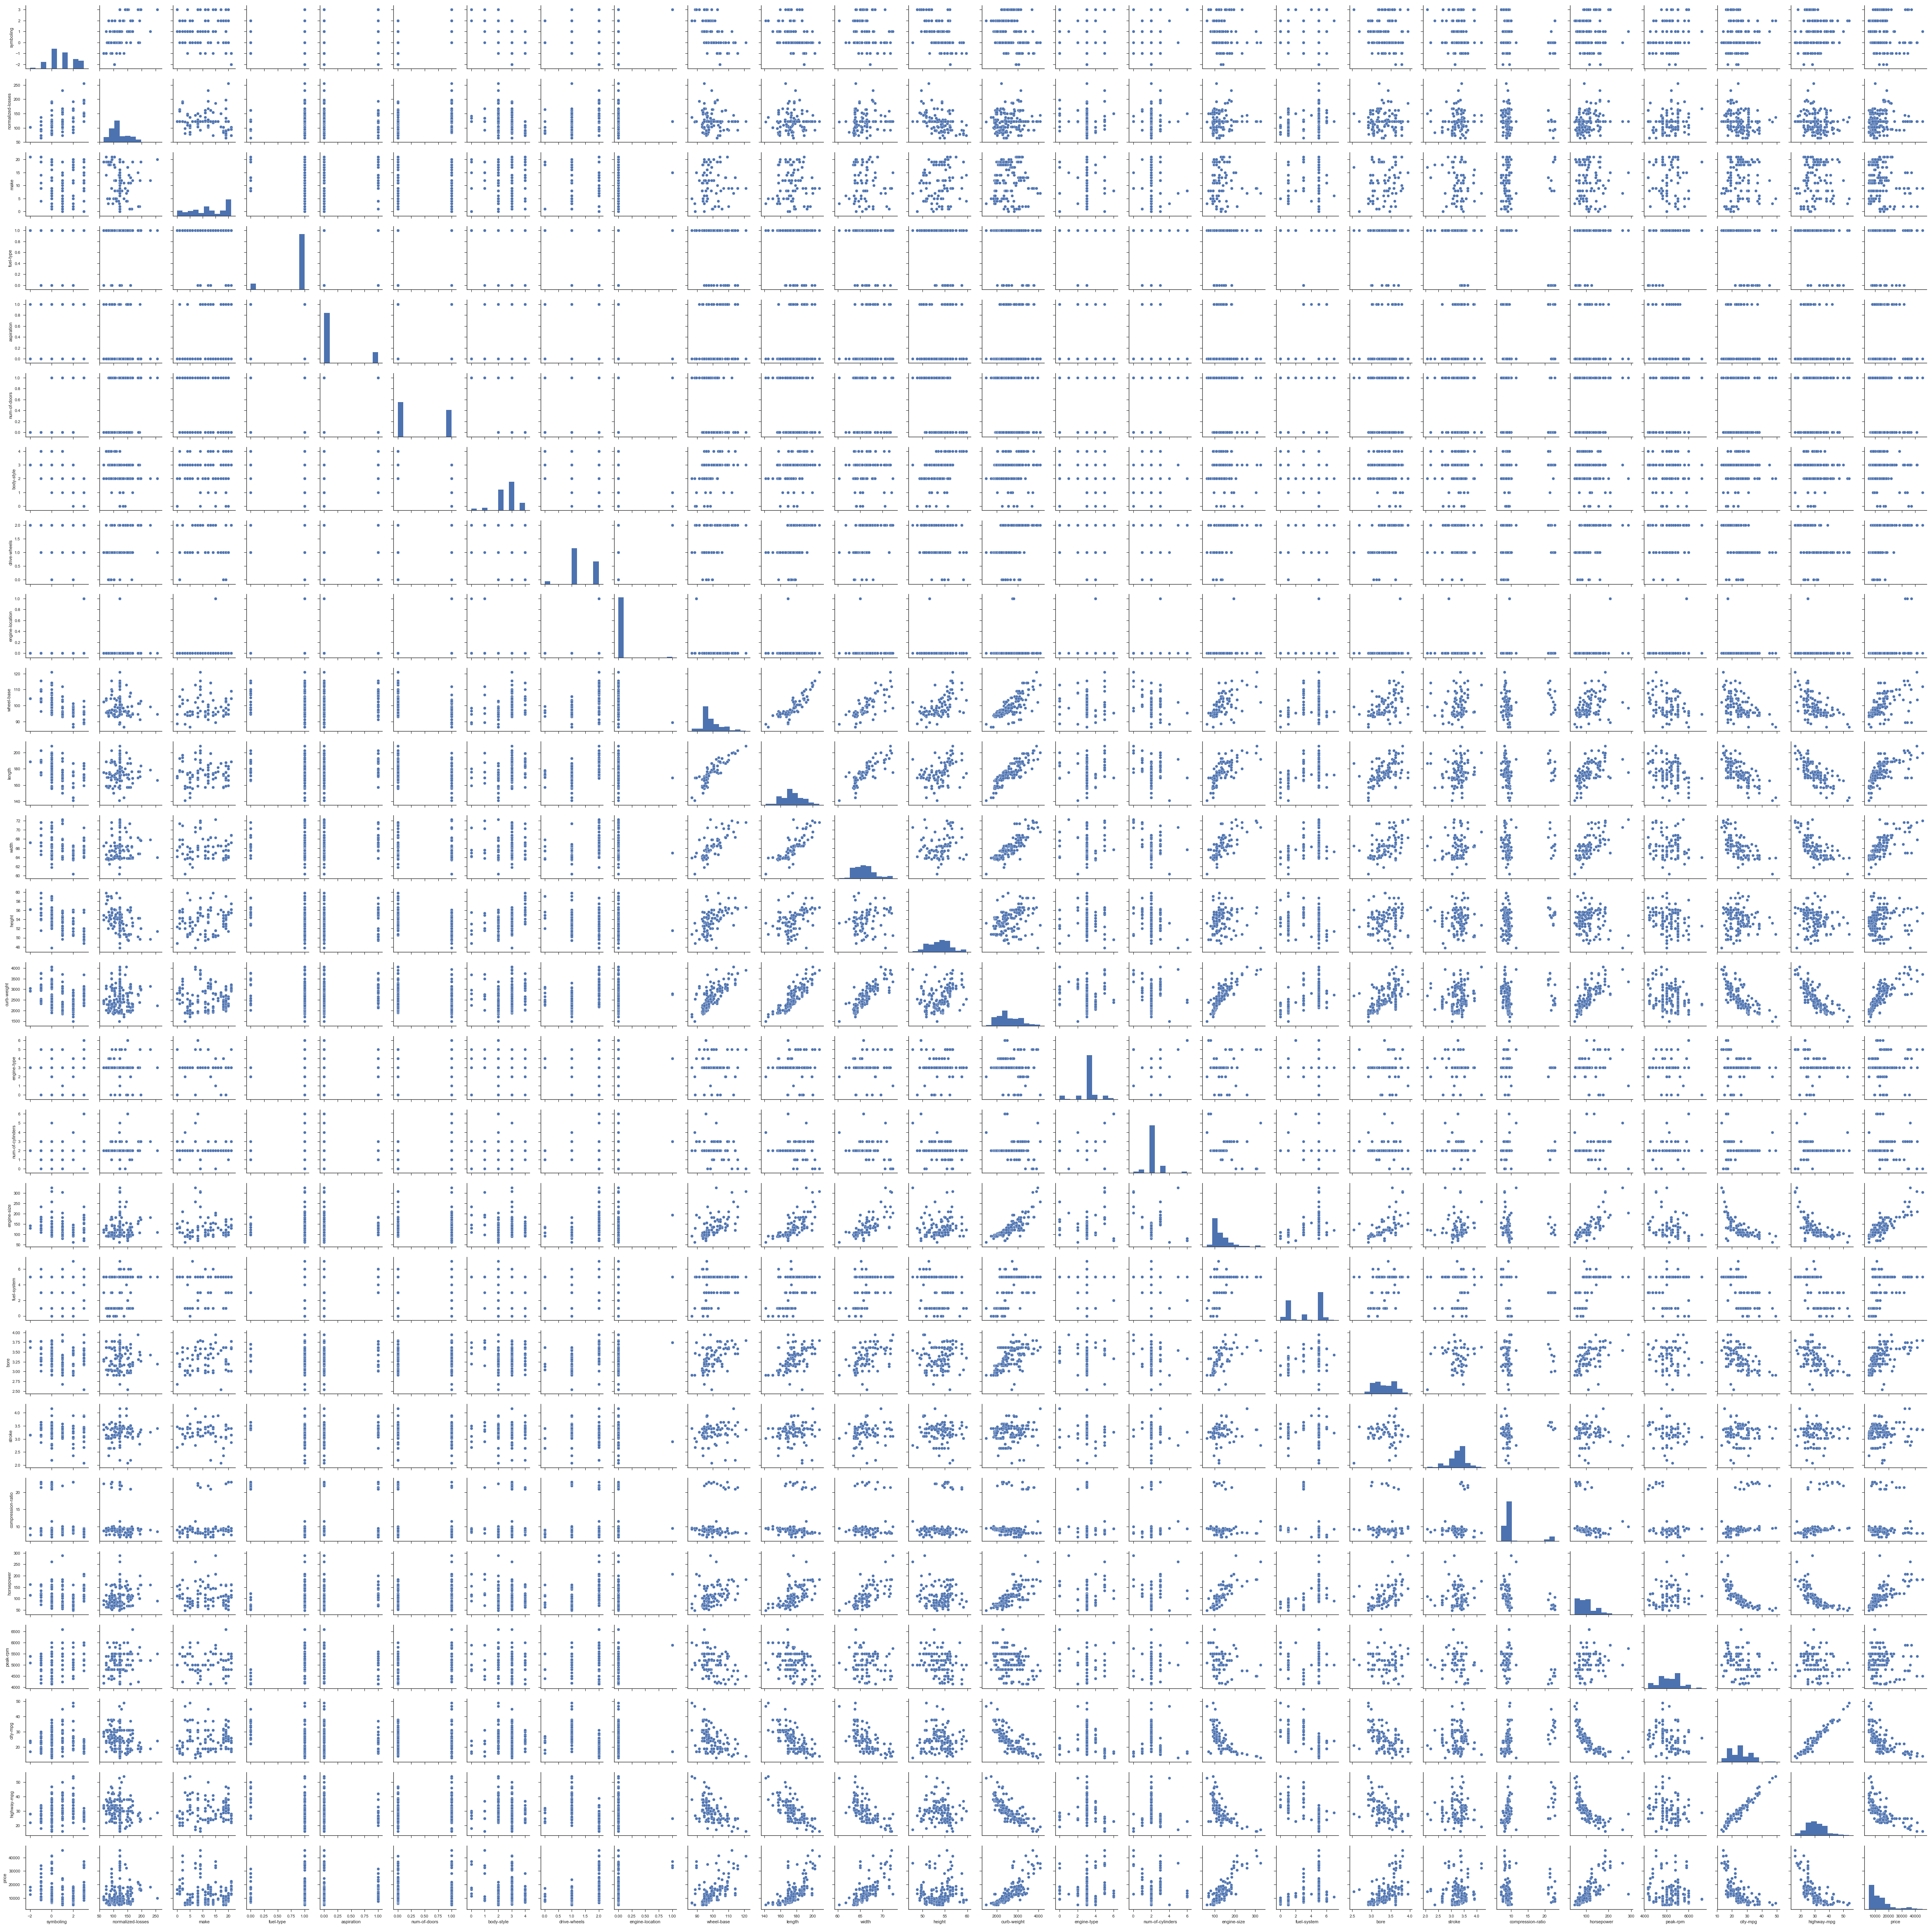

In [400]:
sns.set(style= 'ticks')
plt = sns.pairplot(df_1)

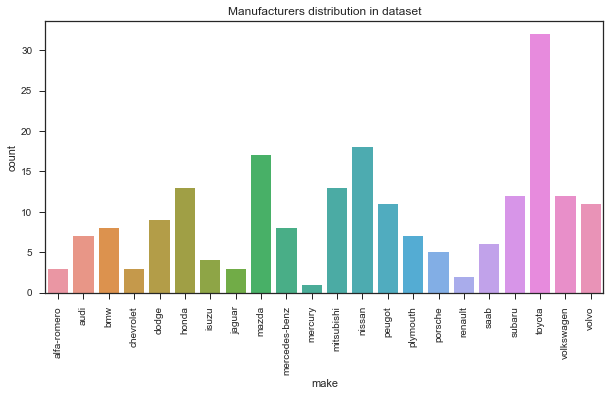

In [405]:
plt.figure(figsize=(10,5))
sns.countplot(x='make', data=df)
plt.xticks(rotation='vertical')
plt.title('Manufacturers distribution in dataset')
plt.show()

###     *****Top Selling Car Manufacturer is **Toyota**


#### Categorical features distributions:

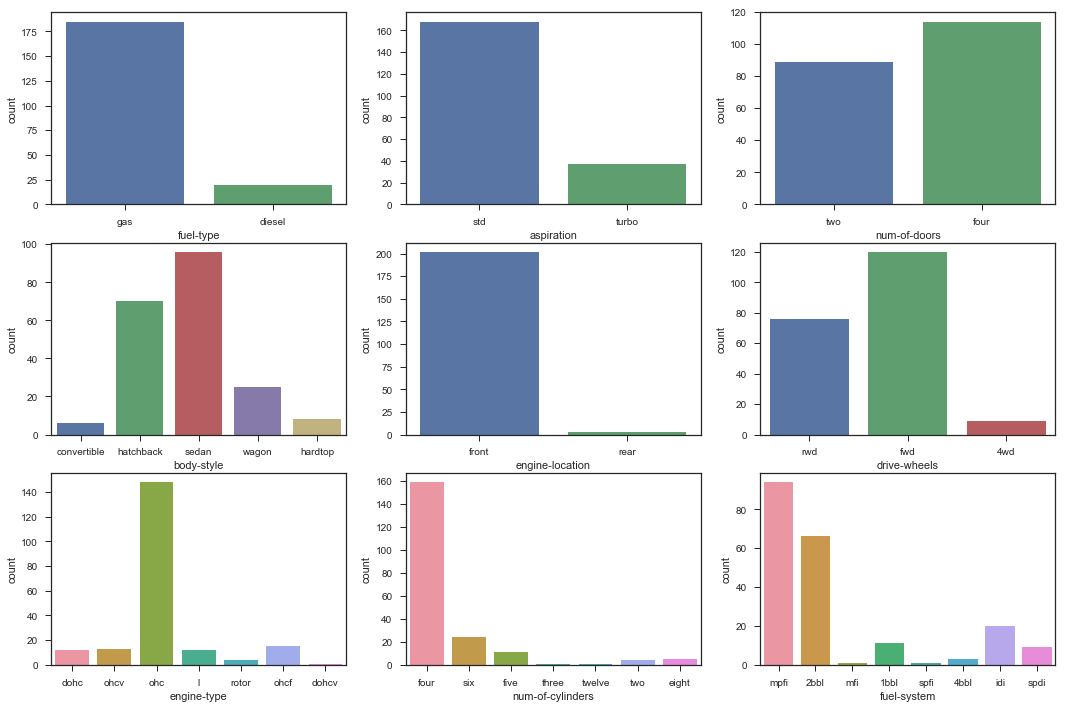

In [406]:
categorical = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'engine-location',
               'drive-wheels', 'engine-type', 'num-of-cylinders', 'fuel-system']
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
for col, ax in zip(categorical[1:], axs.ravel()):
    sns.countplot(x=col, data=df, ax=ax)


#### Max Cars are running on Gas
#### Max Cars have engine in front
#### Max Cars have 4 cylinders
#### Max Cars have mpfi as fuel system

### <font color='red'> 6.  Are there any independent attributes which have |R| close to 1? <\font>

### <font color='red'>7. Which attributes seem to have stronger relation with the dependent variable (Price of the car)? <\font>

In [408]:
df_1.corr()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,4.651899e-01,-0.118794,0.194311,-0.059866,0.663595,-0.596135,-0.041671,2.124709e-01,-0.531954,...,-0.105790,0.091163,-0.130083,-0.008689,-0.178515,0.071389,0.273679,-0.035823,0.034606,-0.082201
normalized-losses,0.465190,1.000000e+00,-0.250975,0.101437,-0.006823,0.357192,-0.250893,0.311032,4.281126e-19,-0.056518,...,0.110997,0.228035,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
make,-0.118794,-2.509755e-01,1.000000,-0.113191,0.054265,-0.151516,0.089494,-0.004317,5.460831e-02,0.078505,...,-0.070918,0.146624,0.251152,-0.201043,0.138828,-0.053654,-0.218342,0.053642,0.050022,-0.161471
fuel-type,0.194311,1.014370e-01,-0.113191,1.000000,-0.401397,0.188496,-0.147853,-0.132257,4.006951e-02,-0.308346,...,-0.069594,0.041529,-0.054457,-0.241820,-0.984356,0.165190,0.477060,-0.255963,-0.191392,-0.110207
aspiration,-0.059866,-6.822700e-03,0.054265,-0.401397,1.000000,-0.052803,0.063028,0.066465,-5.719146e-02,0.257611,...,0.108217,0.288086,0.212623,0.222970,0.295541,0.240182,-0.183629,-0.202362,-0.254416,0.177285
num-of-doors,0.663595,3.571925e-01,-0.151516,0.188496,-0.052803,1.000000,-0.685640,0.104877,1.391294e-01,-0.439635,...,-0.013919,0.006980,-0.108510,0.006892,-0.171797,0.128184,0.240298,0.014271,0.037452,-0.041945
body-style,-0.596135,-2.508926e-01,0.089494,-0.147853,0.063028,-0.685640,1.000000,-0.155745,-2.770093e-01,0.401362,...,-0.073352,-0.065079,0.010562,-0.015344,0.136243,-0.152438,-0.109410,0.031697,-0.007170,-0.072677
drive-wheels,-0.041671,3.110317e-01,-0.004317,-0.132257,0.066465,0.104877,-0.155745,1.000000,1.478645e-01,0.459745,...,0.524307,0.424686,0.481805,0.071623,0.127479,0.516936,-0.039724,-0.449581,-0.452220,0.576866
engine-location,0.212471,4.281126e-19,0.054608,0.040070,-0.057191,0.139129,-0.277009,0.147865,1.000000e+00,-0.187790,...,0.196826,0.105971,0.185044,-0.138459,-0.019762,0.317610,0.198400,-0.153487,-0.102026,0.331013
wheel-base,-0.531954,-5.651842e-02,0.078505,-0.308346,0.257611,-0.439635,0.401362,0.459745,-1.877902e-01,1.000000,...,0.569329,0.384601,0.488760,0.160944,0.249786,0.351957,-0.360704,-0.470414,-0.544082,0.583168


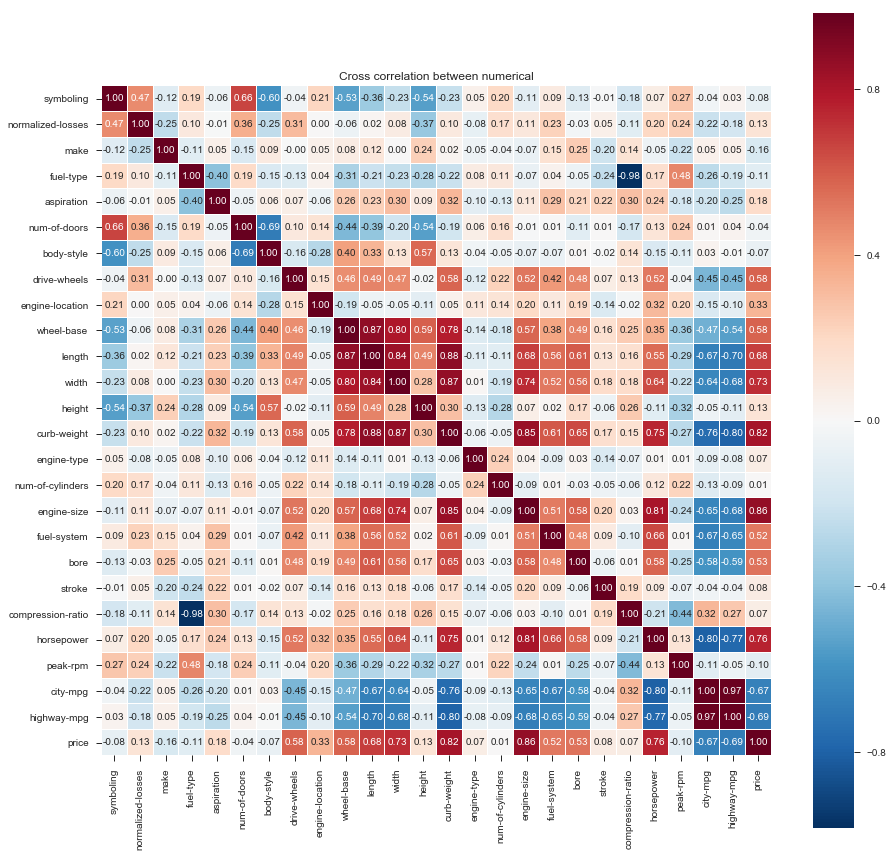

In [409]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(df_1.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Cross correlation between numerical')
plt.show()


In [410]:
## Above graph shows Wheel base , Length , Width are highly correlated. 
## Highway mpg and city mpg is also highly correlated. 
## Compression ratio and fuel type is also correlated 
## Engine size and horse power is also correlated
df_2 = df_1.drop(['length','width','city-mpg','fuel-type','horsepower'],axis=1)
df_2.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,height,...,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,peak-rpm,highway-mpg,price
0,3,122.0,0,0,1,0,2,0,88.6,48.8,...,0,2,130,5,3.47,2.68,9.0,5000.0,27,13495.0
1,3,122.0,0,0,1,0,2,0,88.6,48.8,...,0,2,130,5,3.47,2.68,9.0,5000.0,27,16500.0
2,1,122.0,0,0,1,2,2,0,94.5,52.4,...,5,3,152,5,2.68,3.47,9.0,5000.0,26,16500.0
3,2,164.0,1,0,0,3,1,0,99.8,54.3,...,3,2,109,5,3.19,3.40,10.0,5500.0,30,13950.0
4,2,164.0,1,0,0,3,0,0,99.4,54.3,...,3,1,136,5,3.19,3.40,8.0,5500.0,22,17450.0


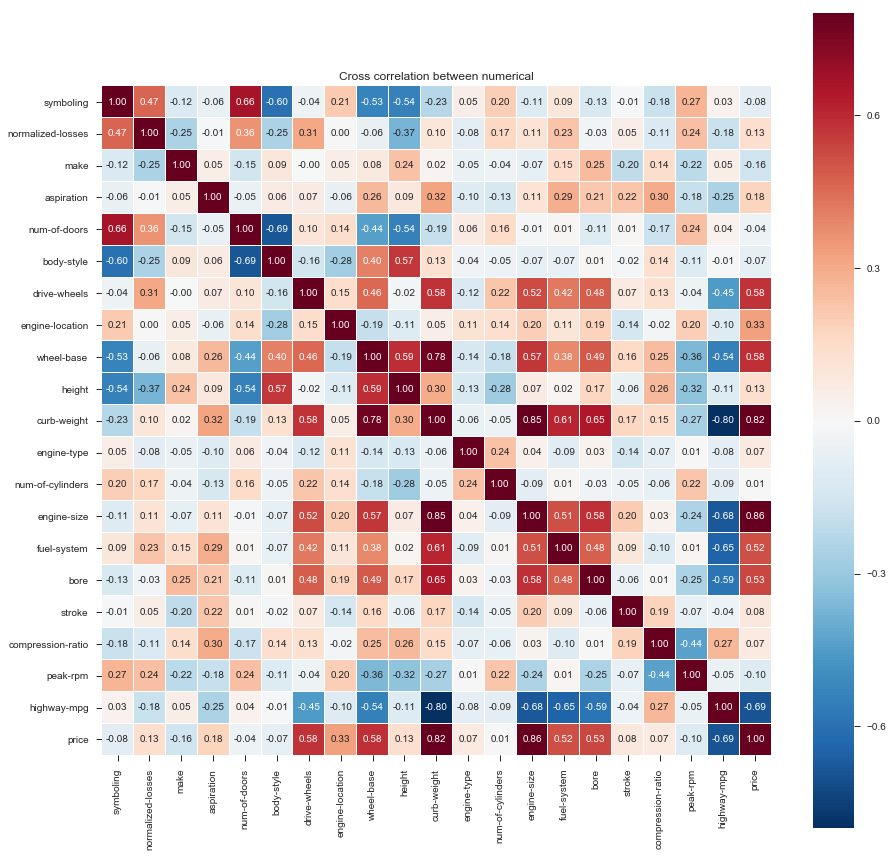

In [411]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(df_2.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Cross correlation between numerical')
plt.show()


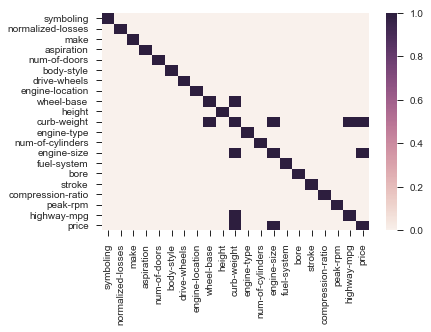

In [412]:
sns.heatmap(df_2.corr().abs()>0.7)

## Above graphs and HeatMap shows that - 
###  Wheel base , Length , Width are highly correlated. 
### Highway mpg and city mpg is also highly correlated. 
### Compression ratio and fuel type is also correlated 
### Engine size and horse power is also correlated

## Attributes which has stronger relationship with price - 

## 1. Curb-Weight
## 2. Engine-Size
## 3. Horsepower
## 4. Mpg(City / Highway mpg)
## 5. Lenght/ Width 

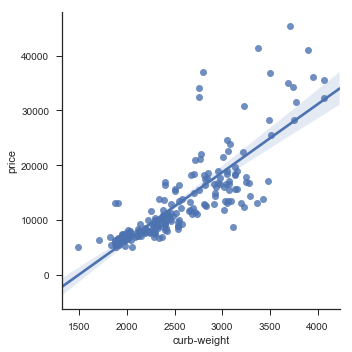

In [415]:
sns.lmplot(x= 'curb-weight' , y='price', data=df_2)

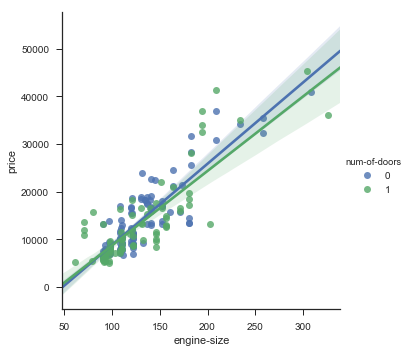

In [416]:
sns.lmplot(x= 'engine-size' , y='price', hue = 'num-of-doors', data=df_2)

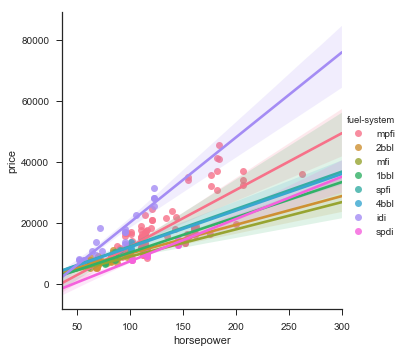

In [457]:
sns.lmplot(x= 'horsepower' , y='price',hue = 'fuel-system', data=df)

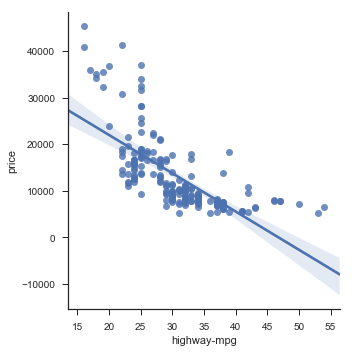

In [460]:
sns.lmplot(x= 'highway-mpg' , y='price', data=df)

## Split data into training and test data

In [417]:
X = df_2.drop('price',axis =1)
X.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,peak-rpm,highway-mpg
0,3,122.0,0,0,1,0,2,0,88.6,48.8,2548,0,2,130,5,3.47,2.68,9.0,5000.0,27
1,3,122.0,0,0,1,0,2,0,88.6,48.8,2548,0,2,130,5,3.47,2.68,9.0,5000.0,27
2,1,122.0,0,0,1,2,2,0,94.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,5000.0,26
3,2,164.0,1,0,0,3,1,0,99.8,54.3,2337,3,2,109,5,3.19,3.40,10.0,5500.0,30
4,2,164.0,1,0,0,3,0,0,99.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,5500.0,22


In [418]:
# Lets use 80% of data for training and 20% for testing

import sklearn
Y = df_2['price']
X = df_2.drop('price',axis =1)

x_train, x_test, y_train,  y_test = sklearn.model_selection.train_test_split(X, Y,train_size=0.8, test_size=0.2, random_state=0)


## <font color='red'>8. Given the above analysis, which algorithm is likely to give a better accuracy? Why? </font>

### Linear Regression could be the best algorithm to solve such problem with better accuracy as most of the attributes (Independent Variables) follow Linear pattern with Dependent variable i.e. (Price)

## Training of the model

In [419]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
lm_1 = regressor.fit(x_train, y_train)

In [420]:
lm_1.score(x_train,y_train)

0.90784703354982244

In [421]:
lm_1.score(x_test,y_test)

0.72232251844508766

In [422]:
df_2.shape

(205, 21)

In [424]:
df_3 = df_2.copy()

In [425]:
# Replace '-' in column names with '_'
names = []
for name in df_3.columns:
    names.append(name.replace('-', '_'))

df_3.columns = names

In [426]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
symboling            205 non-null int64
normalized_losses    205 non-null float64
make                 205 non-null int64
aspiration           205 non-null int64
num_of_doors         205 non-null int64
body_style           205 non-null int64
drive_wheels         205 non-null int64
engine_location      205 non-null int64
wheel_base           205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null int64
num_of_cylinders     205 non-null int64
engine_size          205 non-null int64
fuel_system          205 non-null int64
bore                 205 non-null float64
stroke               205 non-null float64
compression_ratio    205 non-null float64
peak_rpm             205 non-null float64
highway_mpg          205 non-null int64
price                205 non-null float64
dtypes: float64(8), int64(13)
memory us

In [428]:
import statsmodels.formula.api as smf

lm0 = smf.ols(formula= 'price ~ symboling+normalized_losses+make+aspiration+num_of_doors+body_style+drive_wheels+engine_location+wheel_base+height+curb_weight+engine_type+num_of_cylinders+engine_size+fuel_system+bore+stroke+compression_ratio+peak_rpm' , data =df_3).fit()


In [429]:
lm0.params

Intercept           -37670.984663
symboling              403.573642
normalized_losses       -7.327280
make                  -205.130679
aspiration            1457.040719
num_of_doors         -1065.102397
body_style            -947.636392
drive_wheels          1199.541192
engine_location      11953.604315
wheel_base             257.047038
height                 239.521428
curb_weight              2.442158
engine_type            438.706257
num_of_cylinders       339.160696
engine_size            108.746056
fuel_system            138.648483
bore                 -1823.326551
stroke               -2906.252613
compression_ratio       85.511402
peak_rpm                 1.702481
dtype: float64

In [430]:
print(lm0.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     68.41
Date:                Fri, 05 Jan 2018   Prob (F-statistic):           4.68e-73
Time:                        00:38:41   Log-Likelihood:                -1915.9
No. Observations:                 205   AIC:                             3872.
Df Residuals:                     185   BIC:                             3938.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.767e+04   9881.72

## Model Builduing Part -2 

In [443]:
from sklearn.preprocessing import Normalizer
# Normalizing Data
nor = Normalizer()
df_4 = nor.fit_transform(df_2)


In [444]:
col = []
for i in df_2.columns:
    col.append(i.replace('-', '_'))  

In [445]:
df_4 = pd.DataFrame(df_4 , columns  = col)
df_4.head()

,symboling,normalized_losses,make,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,height,...,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,peak_rpm,highway_mpg,price
0,0.000205,0.008347,0.000000,0.0,0.000068,0.000000,0.000137,0.0,0.006062,0.003339,...,0.000000,0.000137,0.008894,0.000342,0.000237,0.000183,0.000616,0.342073,0.001847,0.923254
1,0.000172,0.007000,0.000000,0.0,0.000057,0.000000,0.000115,0.0,0.005083,0.002800,...,0.000000,0.000115,0.007459,0.000287,0.000199,0.000154,0.000516,0.286871,0.001549,0.946674
2,0.000057,0.006983,0.000000,0.0,0.000057,0.000114,0.000114,0.0,0.005409,0.002999,...,0.000286,0.000172,0.008700,0.000286,0.000153,0.000199,0.000515,0.286173,0.001488,0.944370
3,0.000132,0.010805,0.000066,0.0,0.000000,0.000198,0.000066,0.0,0.006575,0.003578,...,0.000198,0.000132,0.007182,0.000329,0.000210,0.000224,0.000659,0.362370,0.001977,0.919103
4,0.000108,0.008858,0.000054,0.0,0.000000,0.000162,0.000000,0.0,0.005369,0.002933,...,0.000162,0.000054,0.007346,0.000270,0.000172,0.000184,0.000432,0.297065,0.001188,0.942505


In [446]:
# Lets use 80% of data for training and 20% for testing

import sklearn
Y_1 = df_4['price']
X_1 = df_4.drop('price',axis =1)

x_train_1, x_test_1, y_train_1,  y_test_1 = sklearn.model_selection.train_test_split(X_1, Y_1,train_size=0.8, test_size=0.2, random_state=0)


In [447]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
lm_2 = regressor.fit(x_train_1, y_train_1)


In [461]:
pred_train_y = regressor.predict(x_train_1)
pred_test_y = regressor.predict(x_test_1)

In [448]:
lm_2.score(x_train_1,y_train_1)

0.97885831416195423

## R^2  = 0.98 for Train data

In [449]:
lm_2.score(x_test_1,y_test_1)

0.95955380140398183

## R^2  = 0.96 for Test data

In [463]:
mse = np.mean((pred_test_y -y_test_1)**2)
mse

0.00030557840223091707

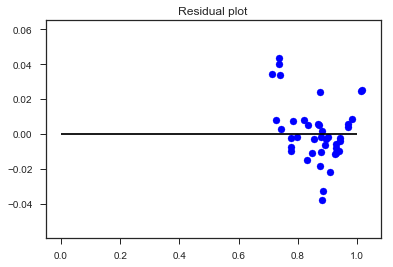

In [469]:
## Residual Vs fitted plot - 
x_plot = plt.scatter(pred_test_y,(pred_test_y - y_test_1),c='b')
plt.hlines(y=0,xmin = 0 , xmax = 1)
plt.title('Residual plot')

### There is no pattern so we can infer that data is linear and there is no Heteroskedasticity issue

## Linear model using OLS - 

In [451]:
import statsmodels.formula.api as smf

lm1 = smf.ols(formula= 'price ~ symboling+normalized_losses+make+aspiration+num_of_doors+body_style+drive_wheels+engine_location+wheel_base+height+curb_weight+engine_type+num_of_cylinders+engine_size+fuel_system+bore+stroke+compression_ratio+peak_rpm' , data =df_4).fit()


In [453]:
lm2 = smf.ols(formula= 'price ~ symboling+normalized_losses+make+aspiration+num_of_doors+drive_wheels+engine_location+wheel_base+height+curb_weight+engine_type+num_of_cylinders+engine_size+fuel_system+bore+stroke+compression_ratio+peak_rpm' , data =df_4).fit()

In [454]:
lm3 = smf.ols(formula= 'price ~ aspiration+num_of_doors+wheel_base+curb_weight+engine_size+fuel_system+bore+stroke+peak_rpm' , data =df_4).fit()

In [455]:
lm1.params

Intercept              1.082893
symboling             -5.346203
normalized_losses      0.492256
make                   1.146586
aspiration          -105.995822
num_of_doors         -74.167904
body_style             2.236349
drive_wheels         -38.043346
engine_location     -413.970616
wheel_base           -14.804723
height                -1.815903
curb_weight            0.256725
engine_type           -1.258844
num_of_cylinders       7.300175
engine_size           -5.246272
fuel_system           45.015508
bore                 293.580680
stroke               177.788996
compression_ratio     -2.669804
peak_rpm              -0.528122
dtype: float64

In [456]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     818.3
Date:                Fri, 05 Jan 2018   Prob (F-statistic):          1.04e-149
Time:                        00:47:30   Log-Likelihood:                 602.69
No. Observations:                 205   AIC:                            -1185.
Df Residuals:                     195   BIC:                            -1152.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0785      0.005    200.674   

## The Above results shows Multi Linear Regression Model  with R^2  = 0.974 